In [44]:
import numpy as np
from division_y_preproceso import division_y_preproceso
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from funciones_modelos import *


In [28]:
X_train,X_test,y_train,y_test,preproceso = division_y_preproceso("df_final2.csv")

In [29]:
#XGBOOSTING

xgb= XGBRegressor(random_state=123)

pipeline_xgb=Pipeline(steps=[
    ("preprocessing", preproceso),
    ("modelo", xgb)
])
#ENTRENAMIENTO e hiperparametros
param_distributions = {
    "modelo__n_estimators": range(150, 500, 20),
    "modelo__learning_rate": [0.01,0.02,0.04,0.06,0.08],
    "modelo__max_depth": range(1, 15),
    "modelo__subsample":np.linspace(0.4, 1,11),
    "modelo__colsample_bytree":np.linspace(0.4, 1,11),
    "modelo__max_leaves": range(2,24,2),
    "modelo__grow_policy":["depthwise","lossguide"],
    "modelo__min_child_weight":[1, 2, 5, 10],
    "modelo__reg_lambda": [0.5, 1, 5, 10],

}
grid_xgb=RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
    random_state=123,
)

modelo_xgb=grid_xgb.fit(X_train, y_train)


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\impute\_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [30]:
df_metricas=metricas(modelo_xgb,X_test,y_test)
df_metricas

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Modelo
mae,818564.194
rmse,1361910.771
media,1912018.916
mae/media,0.428
r2,0.747
r2_ajustado,0.738


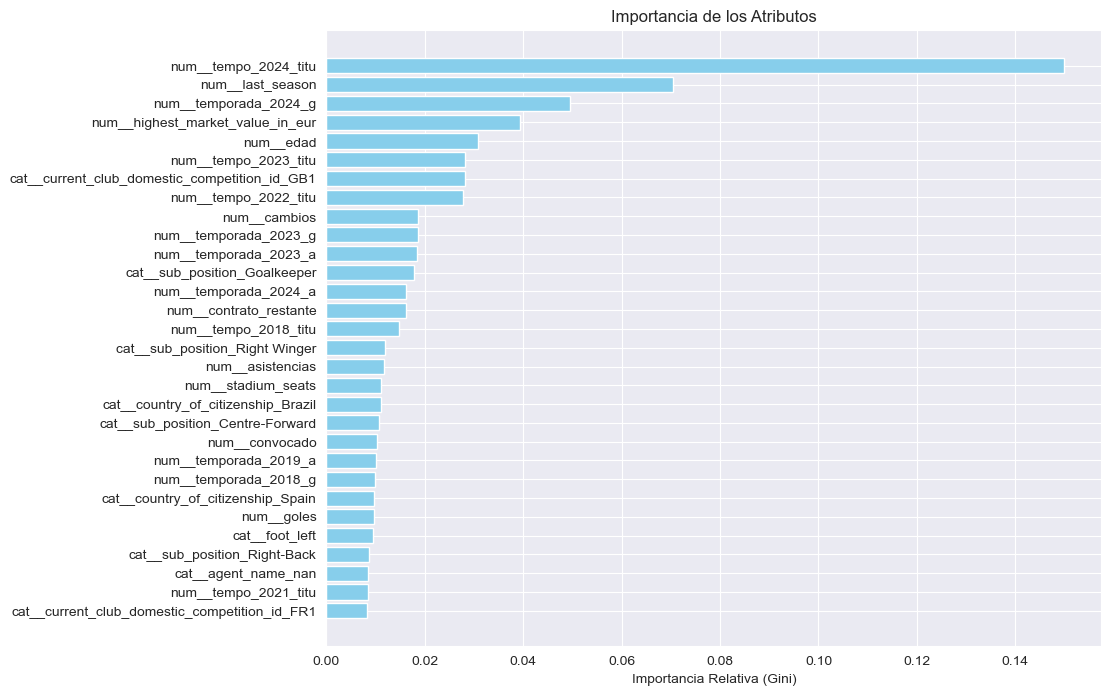

In [32]:
importancia_atributos(modelo_xgb,30)

In [46]:
#Guardado del modelo
guardar_modelo(modelo_xgb,"xgb")